Import libraries required

In [38]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

Read the dataset location

In [20]:
dataset = pd.read_csv("C:/Users/user/Downloads/student/student-mat.csv", sep=";")
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Select few fields that will be used to determine the final grade

In [31]:
dataset = dataset[["G1", "G2", "G3", "absences", "freetime"]]
dataset.head()

,G1,G2,G3,absences,freetime
0,5,6,6,6,3
1,5,5,6,4,3
2,7,8,10,10,3
3,15,14,15,2,2
4,6,10,10,4,3


In [35]:
#predict= "G3"
x = np.array(dataset.drop(["G3"], 1))
y = np.array(dataset["G3"])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

C:\Users\user\AppData\Local\Temp\ipykernel_9144\2696482324.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(dataset.drop(["G3"], 1))


Implementing the linear Regression

In [43]:
best = 0
for _ in range(20):   
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accurracy" + str(acc))
    
  
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124
Accurracy0.8142015719072124


In [51]:
prediction = linear.predict(x_test)

for x in range (len(prediction)):
    print(prediction[x], x_test[x], y_test[x])

12.070021697999813 [12 12 13  3] 13
14.921580061363782 [15 15  0  2] 15
10.637989734004666 [10 11  6  4] 11
9.337924290091504 [10 10  4  2] 11
7.030197011615101 [8 8 0 3] 0
15.155543060774429 [16 15  2  2] 15
18.564736693244768 [17 18  0  5] 18
11.44187550388661 [12 11 16  5] 12
5.721939900125324 [6 7 0 3] 0
8.815870701416614 [10  9 10  4] 10
19.205388451984305 [18 18 24  2] 18
18.277727537275638 [16 18  0  4] 18
9.298464254490426 [ 9 10  4  3] 10
12.728354826842368 [13 12 20  5] 12
13.697637474456949 [12 14  0  4] 15
13.126633855333234 [13 13 14  2] 14
15.129669146130754 [14 15  0  5] 15
12.592074994353357 [12 13  0  3] 14
6.455097266381728 [8 7 8 4] 8
11.973419672051945 [10 12 16  4] 11
9.47938109734259 [10 10  8  2] 10
5.076112043587755 [ 6  6 13  2] 8
4.129688033159612 [6 5 7 4] 6
7.9058926184177025 [8 9 4 1] 10
17.671359716339147 [17 17 13  2] 17
4.9033865759908615 [7 6 0 3] 0
11.557240917875307 [12 12  2  2] 11
11.800694496776396 [11 12 10  3] 13
7.061465379639564 [7 8 2 4] 9
9.3

Saving model

In [39]:
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

Loading our model

In [40]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


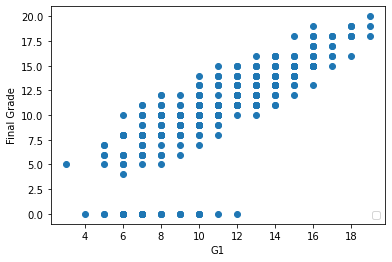

In [47]:
# Drawing and plotting model
plot = "G1" # Change this to G1, G2, freetime or absences to see other graphs
plt.scatter(dataset[plot], dataset["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


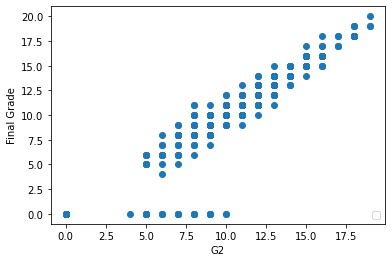

In [48]:
# Drawing and plotting model
plot = "G2" # Change this to G1, G2, freetime or absences to see other graphs
plt.scatter(dataset[plot], dataset["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


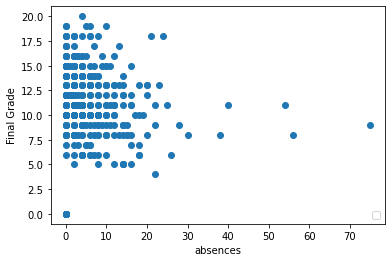

In [49]:
# Drawing and plotting model
plot = "absences" # Change this to G1, G2, freetime or absences to see other graphs
plt.scatter(dataset[plot], dataset["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


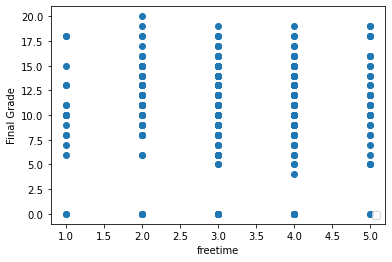

In [50]:
# Drawing and plotting model
plot = "freetime" # Change this to G1, G2, freetime or absences to see other graphs
plt.scatter(dataset[plot], dataset["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()